In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# set plot type
plt.rcParams['figure.figsize'] = (16, 4)
font = {'family': 'Segoe Script', 'weight': 'normal', 'size': 15}
plt.rc('font',**font)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.unicode_minus']=False # show minus

In [51]:
df_s = pd.read_csv('news_CNBC.csv')
df_s.head()

,Unnamed: 0,Unnamed: 0.1,Title,Time,Content,Link,Date,positive,negative,positive_std,negative_std,test
0,0,0,"Sears just opened a new store, here's what it ...","Published Fri, May 24 2019 8:27 AM EDT","Like many suburban shopping areas, Overland Pa...",https://www.cnbc.com/2019/05/24/sears-just-ope...,2019-05-24,0.037013,0.564442,-0.211516,0.538001,NaN
1,1,1,Novartis' gene therapy Zolgensma will cost $2....,"Published Fri, May 24 2019 1:03 PM EDT",The Food and Drug Administration on Friday app...,https://www.cnbc.com/2019/05/24/fda-approves-n...,2019-05-24,0.052434,0.537453,0.796086,-0.071784,NaN
2,2,2,United extends Boeing 737 Max cancellations th...,"Published Fri, May 24 2019 1:00 PM EDT",United Airlines will take its 14 Boeing 737 Ma...,https://www.cnbc.com/2019/05/24/united-extends...,2019-05-24,0.029661,0.567797,-0.691834,0.613807,0.796086
3,3,3,'Sonic the Hedgehog' movie release pushed to F...,"Published Fri, May 24 2019 12:39 PM EDT",It seems Paramount Pictures needed more than f...,https://www.cnbc.com/2019/05/24/sonic-the-hedg...,2019-05-24,0.036630,0.512821,-0.236508,-0.628344,NaN
4,4,4,Trump administration to roll back health prote...,"Published Fri, May 24 2019 10:53 AM EDT",The Trump administration on Friday rolled back...,https://www.cnbc.com/2019/05/24/trump-administ...,2019-05-24,0.017094,0.653846,-1.512909,2.558045,NaN


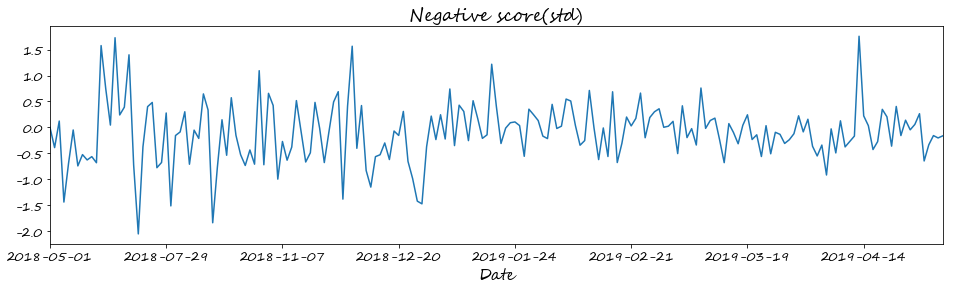

In [108]:
neg_score =  df_s['negative_std'].groupby(df_s['Date']).mean()
high_neg = neg_score[neg_score>0.4]
plt.title('Negative score(std)')
neg_score.loc['2018-05-01':'2019-05-01'].plot()

In [109]:
df_p = pd.read_csv('industry_etf_bydate.csv')
df_p['Date'] = df_p['date']
df_p = df_p.set_index('date')
df_p = df_p.drop(['Unnamed: 0'], axis=1)

df_p.head()

,Symbols,open,high,low,close,volume,Date
date,,,,,,,
2015-05-01,DIA,163.1623,163.8906,162.9528,163.7905,3895734,2015-05-01
2015-05-01,IBB,112.1416,114.0600,111.8950,113.8780,7509189,2015-05-01
2015-05-01,IHE,159.5720,161.3193,159.5720,161.2154,52208,2015-05-01
2015-05-01,IVV,193.3584,194.6242,193.2575,194.5600,2983091,2015-05-01
2015-05-01,IYC,137.3856,138.9029,137.3856,138.9029,54411,2015-05-01


In [111]:
d1 = df_p[df_p['Symbols']=='SPY']['close'].loc['2017-05-01':'2019-05-01']
d2 = high_neg.loc['2017-05-01':'2019-05-01']
k = pd.merge(d1,d2,how='outer', left_index=True,right_index=True)

print(k)

               close  negative_std
2017-05-01  229.7639      0.444057
2017-05-02  229.8505      0.793066
2017-05-03  229.5714           NaN
2017-05-04  229.8409           NaN
2017-05-05  230.7458           NaN
2017-05-08  230.7073           NaN
2017-05-09  230.4955           NaN
2017-05-10  230.9094           NaN
2017-05-11  230.4377           NaN
2017-05-12  230.0527           NaN
2017-05-15  231.3234           NaN
2017-05-16  231.1116           NaN
2017-05-17  227.0107           NaN
2017-05-18  227.9252           NaN
2017-05-19  229.4077           NaN
2017-05-22  230.5725           NaN
2017-05-23  231.0827           NaN
2017-05-24  231.6218           NaN
2017-05-25  232.7288           NaN
2017-05-26  232.6807           NaN
2017-05-30  232.4786      0.979913
2017-05-31  232.4208           NaN
2017-06-01  234.2691           NaN
2017-06-02  235.0488           NaN
2017-06-05  234.8755           NaN
2017-06-06  234.1247           NaN
2017-06-07  234.5579           NaN
2017-06-08  234.6734

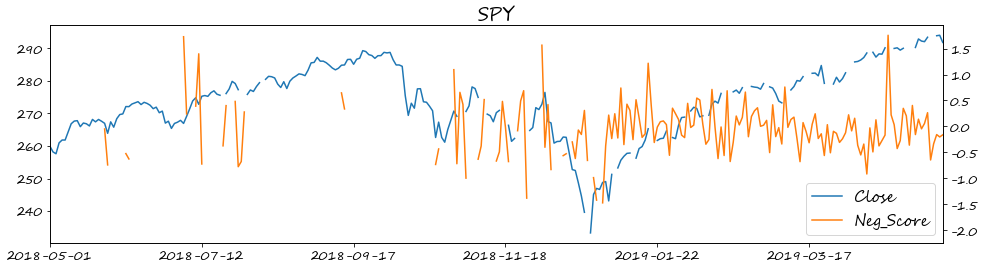

In [119]:
price_score = pd.merge(k.loc['2018-05-01':]['close'],neg_score.loc['2018-05-01':'2019-05-01']
                       ,how='outer', left_index=True,right_index=True)
fig=plt.figure()
plt.title('SPY')
price_score['close'].plot(label='Close')
price_score['negative_std'].plot(secondary_y=True,label='Neg_Score')

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

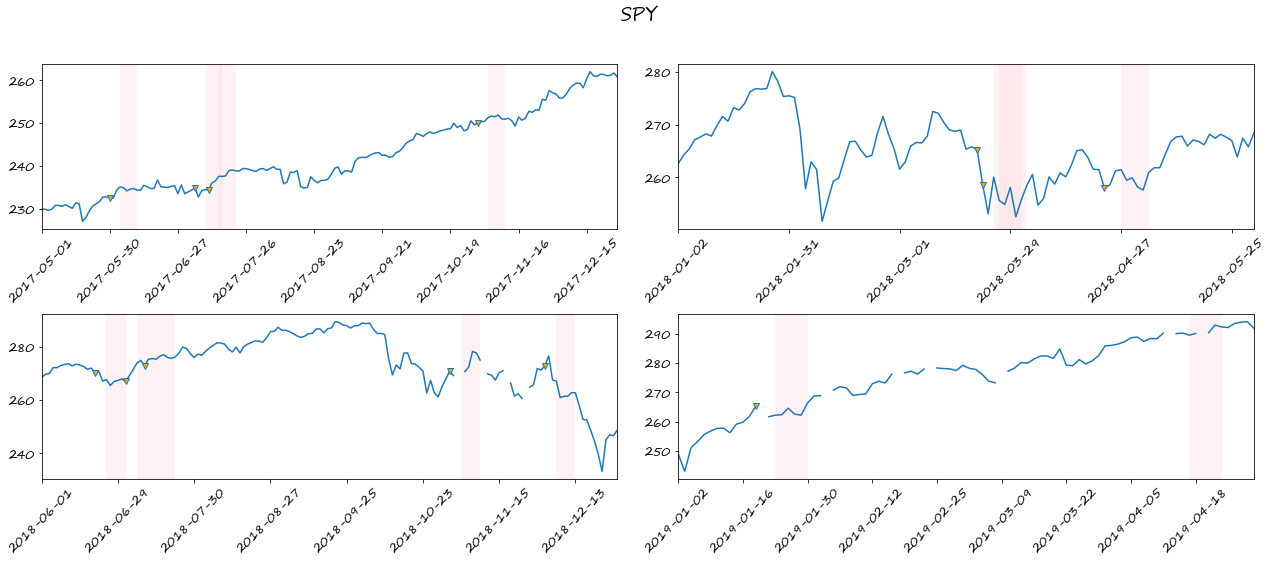

In [106]:
s = k['negative_std']#.rolling(10,min_periods = 1).mean()

def get_mark_loc(df):
    loc_ = []
    for i in df[abs(df)>0.8].index:
        loc_.append(df.index.get_loc(i))
    return loc_

def highlight(indices,ax):
    i=0
    while i<len(indices):
        ax.axvspan(indices[i]+3, indices[i]+8, facecolor='pink', edgecolor='none', alpha=.2)
        i+=1

fig,axes=plt.subplots(2,2,figsize=(18,8))
plt.suptitle('SPY')

def subplot(close,score,ax):
    ax = close.plot(ax=ax,markevery=get_mark_loc(score), marker='v', markerfacecolor='orange')
    highlight(get_mark_loc(score), ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)


subplot(k['close'].loc['2017-05-01':'2017-12-31'],k['negative_std'].loc['2017-05-01':'2017-12-31'],axes[0,0])
subplot(k['close'].loc['2018-01-01':'2018-06-01'],k['negative_std'].loc['2018-01-01':'2018-06-01'],axes[0,1])
subplot(k['close'].loc['2018-06-01':'2018-12-31'],k['negative_std'].loc['2018-06-01':'2018-12-31'],axes[1,0])
subplot(k['close'].loc['2019-01-01':'2019-05-01'],k['negative_std'].loc['2019-01-01':'2019-05-01'],axes[1,1])
plt.tight_layout()
fig.subplots_adjust(top=0.88)